In [1]:
import findspark
findspark.init()
findspark.find()

'/opt/spark'

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Read CSV").getOrCreate()
df1 = spark.read.format("csv").option("header", "true").load("ddos-tcp-syn-flood.csv")
df2 = spark.read.format("csv").option("header", "true").load("normal-traffic.csv")
df3 = spark.read.format("csv").option("header", "true").load("port-scanning.csv")

merged_df = df1.union(df2).union(df3)
merged_df.show()

# czytanie 3 plików, po 300000 wierszy z każdego oprócz scanning, łączenie w całość

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/17 09:05:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/17 09:05:20 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+---------------+--------------+------------------+----------+-----------+------------------+-------------+-----------+-----------------------+-----------+--------------+-------------------+----------------------+-------------------+------------+---------------------+--------------------+-------------+-------------+------------+------------+------------+------------------+------------------+------------------+---------------------+-----------+----------+-------------+-------+-----------+--------------------+-------+-----------+--------+----------+--------------+------------+----------------+----------+------------+------------------+----------------------+-------------------------+-----------------+----------------------+-------------+-------------+--------+-------------------+--------+------------+--------------+--------------+----------+--------------+--------+---------+--------------+-------------+------------+-----------+
|          frame.time|    ip.src_host| 

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct
from pyspark.sql.functions import col
import re


for col_name in merged_df.columns:
    new_col_name = re.sub(r'\.', '-', col_name)
    merged_df = merged_df.withColumnRenamed(col_name, new_col_name)


merged_df.show()

# zamiana kropek na myślniki w nazwach kolumn


+--------------------+---------------+--------------+------------------+----------+-----------+------------------+-------------+-----------+-----------------------+-----------+--------------+-------------------+----------------------+-------------------+------------+---------------------+--------------------+-------------+-------------+------------+------------+------------+------------------+------------------+------------------+---------------------+-----------+----------+-------------+-------+-----------+--------------------+-------+-----------+--------+----------+--------------+------------+----------------+----------+------------+------------------+----------------------+-------------------------+-----------------+----------------------+-------------+-------------+--------+-------------------+--------+------------+--------------+--------------+----------+--------------+--------+---------+--------------+-------------+------------+-----------+
|          frame-time|    ip-src_host| 

In [4]:

selected_df = merged_df 
selected_df.show()

#potrzebne (wiem troche głupie )

+--------------------+---------------+--------------+------------------+----------+-----------+------------------+-------------+-----------+-----------------------+-----------+--------------+-------------------+----------------------+-------------------+------------+---------------------+--------------------+-------------+-------------+------------+------------+------------+------------------+------------------+------------------+---------------------+-----------+----------+-------------+-------+-----------+--------------------+-------+-----------+--------+----------+--------------+------------+----------------+----------+------------+------------------+----------------------+-------------------------+-----------------+----------------------+-------------+-------------+--------+-------------------+--------+------------+--------------+--------------+----------+--------------+--------+---------+--------------+-------------+------------+-----------+
|          frame-time|    ip-src_host| 

In [5]:
nw_df = selected_df

# potrzebne, ale jeszcze głupsze

In [42]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import FloatType



indexer = StringIndexer(inputCol="Attack_type", outputCol="Attack_type_index")
indexed_df = indexer.fit(selected_df).transform(selected_df)


indexed_df.select("Attack_type", "Attack_type_index").distinct().show()

tcp_flags_indexer = StringIndexer(inputCol="tcp-flags", outputCol="tcp-flags_index")
indexed_df = tcp_flags_indexer.fit(indexed_df).transform(indexed_df)

dns_qry_name_len_indexer = StringIndexer(inputCol="dns-qry-name-len", outputCol="dns-qry-name-len_index")
indexed_df = dns_qry_name_len_indexer.fit(indexed_df).transform(indexed_df)
dns_qry_qu_indexer = StringIndexer(inputCol="dns-qry-qu", outputCol="dns-qry-qu_index")
indexed_df = dns_qry_qu_indexer.fit(indexed_df).transform(indexed_df)

mqtt_conack_flags_indexer = StringIndexer(inputCol="mqtt-conack-flags", outputCol="mqtt-conack-flags_index")
indexed_df = mqtt_conack_flags_indexer.fit(indexed_df).transform(indexed_df)
mqtt_conflags = StringIndexer(inputCol="mqtt-conflags", outputCol="mqtt-conflags_index")
indexed_df = mqtt_conflags.fit(indexed_df).transform(indexed_df)

mqtt_hdrflags = StringIndexer(inputCol="mqtt-hdrflags", outputCol="mqtt-hdrflags_index")
indexed_df = mqtt_hdrflags.fit(indexed_df).transform(indexed_df)
mqtt_msg = StringIndexer(inputCol="mqtt-msg", outputCol="mqtt-msg_index")
indexed_df = mqtt_msg.fit(indexed_df).transform(indexed_df)

mqtt_protoname = StringIndexer(inputCol="mqtt-protoname", outputCol="mqtt-protoname_index")
indexed_df = mqtt_protoname.fit(indexed_df).transform(indexed_df)

mqtt_topic = StringIndexer(inputCol="mqtt-topic", outputCol="mqtt-topic_index")
indexed_df = mqtt_topic.fit(indexed_df).transform(indexed_df)

# to wszystko powyżej to jest robienie indexów dla kolumn, które są stringami


selected_columns = [
    "arp-opcode",
    "arp-hw-size",
    "icmp-checksum",
    "icmp-seq_le",
    "icmp-transmit_timestamp",
    "icmp-unused",
    "http-file_data",
    "http-content_length",
    "http-request-uri-query",
    "http-request-method",
    "http-referer",
    "http-request-full_uri",
    "http-request-version",
    "http-response",
    "http-tls_port",
    "tcp-ack",
    "tcp-ack_raw",
    "tcp-connection-fin",
    "tcp-connection-rst",
    "tcp-connection-syn",
    "tcp-connection-synack",
    "tcp-dstport",
    "tcp-flags_index",
    "tcp-flags-ack",
    "tcp-len",
    "tcp-seq",
    "tcp-srcport",
    "udp-port",
    "udp-stream",
    "udp-time_delta",
    "dns-qry-name",
    "dns-qry-name-len_index",
    "dns-qry-qu_index",
    "dns-qry-type",
    "dns-retransmission",
    "dns-retransmit_request",
    "dns-retransmit_request_in",
    "mqtt-conack-flags_index",
    "mqtt-conflag-cleansess",
    "mqtt-conflags_index",
    "mqtt-hdrflags_index",
    "mqtt-len",
    "mqtt-msg_decoded_as",
    "mqtt-msg_index",
    "mqtt-msgtype",
    "mqtt-proto_len",
    "mqtt-protoname_index",
    "mqtt-topic_index",
    "mqtt-topic_len",
    "mqtt-ver",
    "mbtcp-len",
    "mbtcp-trans_id",
    "mbtcp-unit_id",
    "Attack_type_index"
]

nw_df = indexed_df.select(selected_columns)


nw_df.show()



+-------------+-----------------+
|  Attack_type|Attack_type_index|
+-------------+-----------------+
|     DDoS_TCP|              0.0|
|       Normal|              1.0|
|Port_Scanning|              2.0|
+-------------+-----------------+



+----------+-----------+-------------+-----------+-----------------------+-----------+--------------+-------------------+----------------------+-------------------+------------+---------------------+--------------------+-------------+-------------+------------+------------+------------------+------------------+------------------+---------------------+-----------+---------------+-------------+-------+-------+-----------+--------+----------+--------------+------------+----------------------+----------------+------------+------------------+----------------------+-------------------------+-----------------------+----------------------+-------------------+-------------------+--------+-------------------+--------------+------------+--------------+--------------------+----------------+--------------+--------+---------+--------------+-------------+-----------------+
|arp-opcode|arp-hw-size|icmp-checksum|icmp-seq_le|icmp-transmit_timestamp|icmp-unused|http-file_data|http-content_length|http-req

In [54]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['tcp-ack_raw', 'tcp-ack']
scaler = MinMaxScaler()


# Znormalizowane kolumny
pandas_df[columns_to_normalize] = scaler.fit_transform(pandas_df[columns_to_normalize])


                           arp-opcode  arp-hw-size  icmp-checksum  \
arp-opcode                   1.000000     0.943016            NaN   
arp-hw-size                  0.943016     1.000000            NaN   
icmp-checksum                     NaN          NaN            NaN   
icmp-seq_le                       NaN          NaN            NaN   
icmp-transmit_timestamp           NaN          NaN            NaN   
icmp-unused                       NaN          NaN            NaN   
http-file_data                    NaN          NaN            NaN   
http-content_length               NaN          NaN            NaN   
http-request-uri-query            NaN          NaN            NaN   
http-request-method               NaN          NaN            NaN   
http-referer                      NaN          NaN            NaN   
http-request-full_uri             NaN          NaN            NaN   
http-request-version              NaN          NaN            NaN   
http-response                     

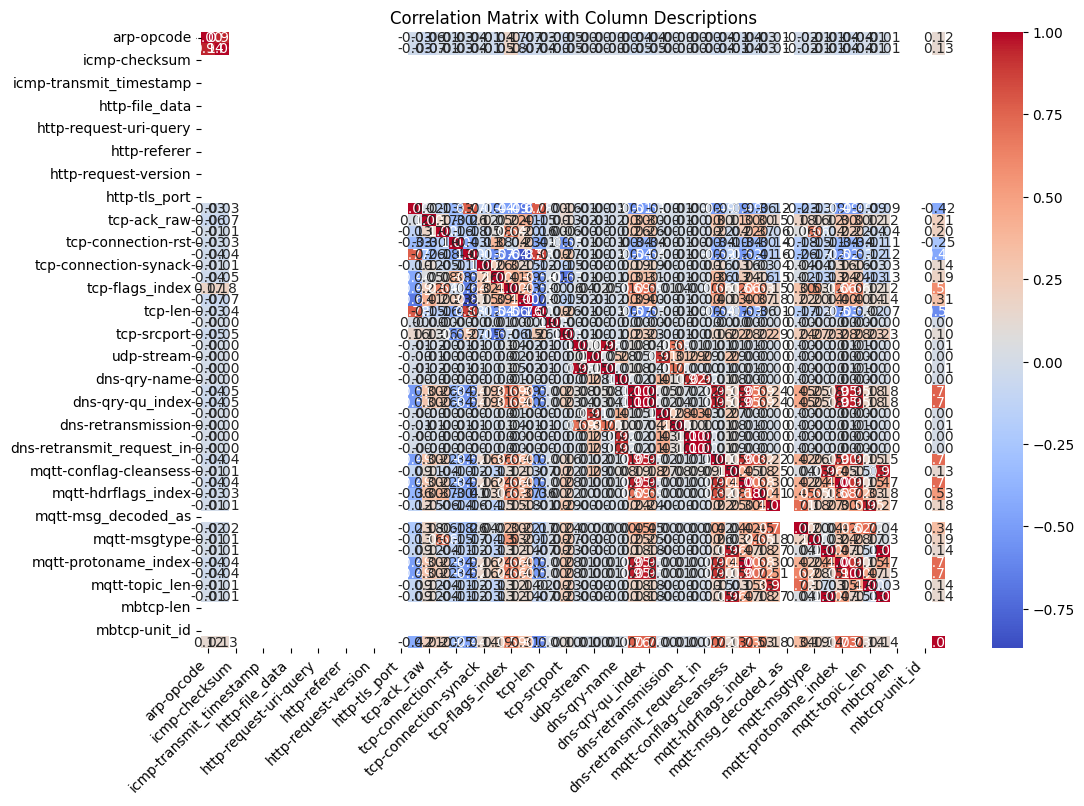

In [55]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


correlation_matrix = pandas_df.corr()


print(correlation_matrix)




plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#heatmap.set_xticklabels([column_descriptions[col.get_text()] for col in heatmap.get_xticklabels()])
#heatmap.set_yticklabels([column_descriptions[col.get_text()] for col in heatmap.get_yticklabels()])

plt.title('Correlation Matrix with Column Descriptions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [41]:
df = pandas_df.astype(str)

# Iteracja po nazwach kolumn
for col in df.columns:
    # Sprawdzenie, czy kolumna zawiera określony ciąg znaków
    if df[col].str.contains('Temperature_and_Humidity').any():
        # Jeśli tak, wyświetlenie nazwy kolumny
        print(f"Określony ciąg znaków jest obecny w kolumnie: {col}")


# to jest nieistotne!!!!!!!!!!!!!!!!!

Określony ciąg znaków jest obecny w kolumnie: mqtt-topic


In [43]:
pandas_df = nw_df.toPandas()

In [56]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622564 entries, 0 to 622563
Data columns (total 54 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp-opcode                 622564 non-null  object 
 1   arp-hw-size                622564 non-null  object 
 2   icmp-checksum              622564 non-null  object 
 3   icmp-seq_le                622564 non-null  object 
 4   icmp-transmit_timestamp    622564 non-null  object 
 5   icmp-unused                622564 non-null  object 
 6   http-file_data             622564 non-null  object 
 7   http-content_length        622564 non-null  object 
 8   http-request-uri-query     622564 non-null  object 
 9   http-request-method        622564 non-null  object 
 10  http-referer               622564 non-null  object 
 11  http-request-full_uri      622564 non-null  object 
 12  http-request-version       622564 non-null  object 
 13  http-response              62

In [48]:
print("\nWartości korelacji dla Attack_type_index:")
print(correlation_matrix["Attack_type_index"])


Wartości korelacji dla Attack_type_index:
arp-opcode                   0.124509
arp-hw-size                  0.131710
icmp-checksum                     NaN
icmp-seq_le                       NaN
icmp-transmit_timestamp           NaN
icmp-unused                       NaN
http-file_data                    NaN
http-content_length               NaN
http-request-uri-query            NaN
http-request-method               NaN
http-referer                      NaN
http-request-full_uri             NaN
http-request-version              NaN
http-response                     NaN
http-tls_port                     NaN
tcp-ack                     -0.420004
tcp-ack_raw                  0.214010
tcp-connection-fin           0.198738
tcp-connection-rst          -0.250967
tcp-connection-syn          -0.444188
tcp-connection-synack        0.143333
tcp-dstport                  0.185987
tcp-flags_index              0.585326
tcp-flags-ack                0.307003
tcp-len                     -0.589863
tcp-seq

In [26]:
#from pyspark.sql.functions import col, countDistinct

#min_unique_values = 10

# Obliczenie liczby unikalnych wartości dla każdej kolumny
#unique_value_counts = df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns))

# Wyświetlenie liczby unikalnych wartości w poszczególnych kolumnach
#print("\nLiczba unikalnych wartości w poszczególnych kolumnach:")
#unique_value_counts.show()

# Lista nazw kolumn do usunięcia
#columns_to_drop = []

# Iteracja przez kolumny i sprawdzenie, czy liczba unikalnych wartości jest poniżej progu
#for column in df.columns:
#    unique_values = unique_value_counts.select(column).collect()[0][0]
#    if unique_values < min_unique_values:
#        columns_to_drop.append(column)

# Usunięcie kolumn z małą liczbą unikalnych wartości
#df_filtered = df.drop(*columns_to_drop)

# Wyświetlenie struktury danych po usunięciu kolumn
#print("\nStruktura danych po usunięciu kolumn:")
#df_filtered.printSchema()


Liczba unikalnych wartości w poszczególnych kolumnach:


24/05/13 20:12:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:39 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/13 20:12:49 WARN RowBasedKeyValueBatch: Calling spill() on

+----------+-----------+-----------+------------------+----------+-----------+------------------+-------------+-----------+-----------------------+-----------+--------------+-------------------+----------------------+-------------------+------------+---------------------+--------------------+-------------+-------------+-------+-----------+------------+------------------+------------------+------------------+---------------------+-----------+---------+-------------+-------+-----------+-----------+-------+-----------+--------+----------+--------------+------------+----------------+----------+------------+------------------+----------------------+-------------------------+-----------------+----------------------+-------------+-------------+--------+-------------------+--------+------------+--------------+--------------+----------+--------------+--------+---------+--------------+-------------+------------+-----------+
|frame-time|ip-src_host|ip-dst_host|arp-dst-proto_ipv4|arp-opcode|arp-hw


Struktura danych po usunięciu kolumn:
root
 |-- frame-time: string (nullable = true)
 |-- ip-src_host: string (nullable = true)
 |-- ip-dst_host: string (nullable = true)
 |-- tcp-ack: string (nullable = true)
 |-- tcp-ack_raw: string (nullable = true)
 |-- tcp-checksum: string (nullable = true)
 |-- tcp-dstport: string (nullable = true)
 |-- tcp-srcport: string (nullable = true)

